## Aishwarya H Y 
## Task 1: Prediction using Supervised ML (Student scores data)

### Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Reading and Importing the dataset

In [2]:
dataset_url= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
data= pd.read_csv(dataset_url)

### Displaying the data 

In [4]:
data.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#for basic statistical details
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###  Two-dimensional graphical representation of data

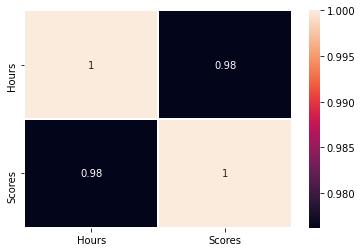

In [7]:
sns.heatmap(data.corr(),linewidth=0.30,annot= True)

### Plotting the distribution of score 

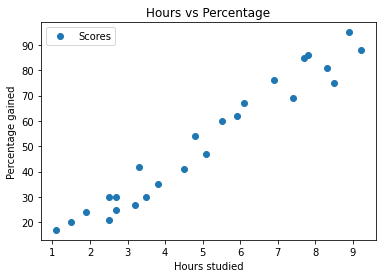

In [8]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage gained')
plt.show()

### Preparing the data  

In [9]:
x=data.iloc[: , :-1].values
y=data.iloc[: ,1].values
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

### Training the data

In [10]:
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

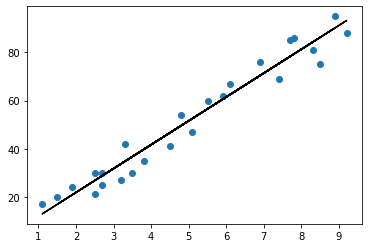

In [11]:
line= regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line, color= 'black')
plt.show()

### Prediction

In [12]:
print(x_test)
y_pred= regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing actual vs predicted data

In [13]:
data1= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing the data set 

In [14]:
hours= 9.25
test= np.array([hours])
test= test.reshape(-1,1)
ownpred= regressor.predict(test)
print("Total number of hours= {}".format(hours))
print("Total PredictScore= {}".format(ownpred[0]))

Total number of hours= 9.25
Total PredictScore= 93.69173248737538


### Evaluating the model

In [15]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root mean squared Error 4.6474476121003665
